In [78]:
# LSTM (Long Short Term Memory)
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
import datetime

In [79]:
# Load Dataset
data = pd.read_csv('D:\\MyPython\\HandsBookData\\StockPredict\\005930.KS_5y.csv')
# Data에 Null 꼭 제거해야 됨.
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1.220000e+03
mean,40016.270492,40416.524590,39624.754098,40027.147541,22890.938160,1.206258e+07
std,10689.083409,10777.740767,10569.297054,10674.229325,21088.950029,5.682308e+06
min,21360.000000,21480.000000,20660.000000,21340.000000,215.374756,0.000000e+00
25%,28980.000000,29400.000000,28615.000000,29000.000000,1343.041992,8.605229e+06
50%,43700.000000,44050.000000,43125.000000,43700.000000,14860.548830,1.078117e+07
75%,47900.000000,48260.000000,47342.500000,47752.500000,45050.000000,1.377936e+07
max,62000.000000,62800.000000,61700.000000,62400.000000,62400.000000,6.468130e+07


In [80]:
# Compute Mid Price
high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices) / 2

In [81]:
# Create Windows
seq_len = 50
sequence_length = seq_len + 1
result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])


In [82]:
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((1052, 50, 1), (117, 50, 1))

In [83]:
# Build a Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_19 (LSTM)               (None, 50, 50)            10400     
_________________________________________________________________
lstm_20 (LSTM)               (None, 64)                29440     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [84]:
# Training
model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=10, epochs=20)

Train on 1052 samples, validate on 117 samples
Epoch 1/20
1052/1052 [==============================] - 6s 5ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 2/20
1052/1052 [==============================] - 5s 5ms/step - loss: 7.6458e-04 - val_loss: 0.0011
Epoch 3/20
1052/1052 [==============================] - 5s 5ms/step - loss: 5.8007e-04 - val_loss: 4.8332e-04
Epoch 4/20
1052/1052 [==============================] - 5s 5ms/step - loss: 4.3409e-04 - val_loss: 4.8565e-04
Epoch 5/20
1052/1052 [==============================] - 5s 5ms/step - loss: 3.3141e-04 - val_loss: 5.2975e-04
Epoch 6/20
1052/1052 [==============================] - 5s 4ms/step - loss: 2.6183e-04 - val_loss: 4.8797e-04
Epoch 7/20
1052/1052 [==============================] - 5s 4ms/step - loss: 2.5062e-04 - val_loss: 3.5897e-04
Epoch 8/20
1052/1052 [==============================] - 5s 5ms/step - loss: 2.3993e-04 - val_loss: 5.5638e-04
Epoch 9/20
1052/1052 [==============================] - 5s 5ms/step - loss: 2.4060e-0

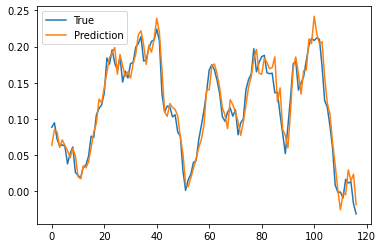

In [85]:
# Predict
pred = model.predict(x_test)
fig = plt.figure(facecolor='white')
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()